# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

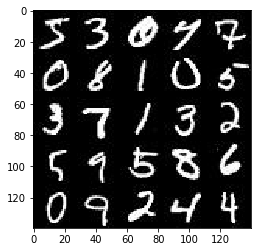

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

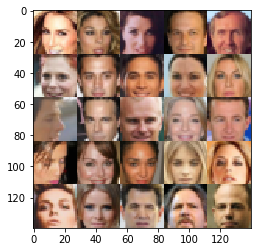

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\vsoft\Miniconda3\envs\deeplearning-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.9.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    tf_learning_rate = tf.placeholder(tf.float32)
    return inputs_real, inputs_z, tf_learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, filters=64, kernel_size=5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        drop1 = tf.layers.dropout(relu1, rate=0.5)
        
        x2 = tf.layers.conv2d(drop1, filters=128, kernel_size=5, strides=2, padding='same')
        relu2 = tf.maximum(alpha * x2, x2)
        drop2 = tf.layers.dropout(relu2, rate=0.5)
        
        x3 = tf.layers.conv2d(drop2, filters=256, kernel_size=5, strides=2, padding='same')
        relu3 = tf.maximum(alpha * x3, x3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        outputs = tf.sigmoid(logits)
        return outputs, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha=0.2
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.layers.dropout(x1, rate=0.5)
        # 4x4x512
        
        x2 = tf.layers.conv2d_transpose(x1, filters=256, kernel_size=4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.layers.dropout(x2, rate=0.5)
        # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, filters=128, kernel_size=5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.layers.dropout(x3, rate=0.5)
        # 14x14x128
        
        x4 = tf.layers.conv2d_transpose(x3, filters=64, kernel_size=5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4 = tf.layers.dropout(x4, rate=0.5)
        # 14x14x128
        
        logits = tf.layers.conv2d(x4, filters=out_channel_dim, kernel_size=5, strides=1, padding='same')
        # 28x28x3
        
        output = tf.tanh(logits)
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_images, image_height, image_width, image_channels = data_shape
    
    input_real, input_z, tf_lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, tf_lr, beta1)
    
    steps = 0
    print_every = 100
    imshow_every = 300
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z:batch_z, tf_lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real:batch_images, input_z:batch_z, tf_lr:learning_rate})
                
                if steps % print_every == 0:
                    d_loss_train = d_loss.eval({input_real:batch_images, input_z:batch_z, tf_lr:learning_rate})
                    g_loss_train = g_loss.eval({input_real:batch_images, input_z:batch_z, tf_lr:learning_rate})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(d_loss_train),
                          "Generator Loss: {:.4f}".format(g_loss_train))
                    
                if steps % imshow_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.1830... Generator Loss: 2.7364
Epoch 1/2... Discriminator Loss: 0.6492... Generator Loss: 1.4248
Epoch 1/2... Discriminator Loss: 0.5081... Generator Loss: 1.8084


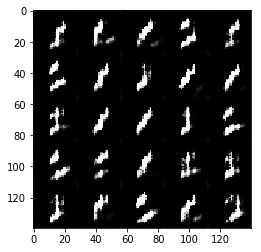

Epoch 1/2... Discriminator Loss: 1.4966... Generator Loss: 0.7111
Epoch 1/2... Discriminator Loss: 1.2393... Generator Loss: 0.7758
Epoch 1/2... Discriminator Loss: 1.0516... Generator Loss: 0.8054


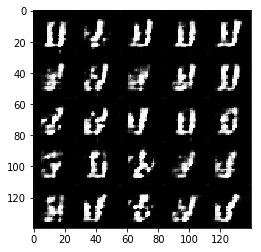

Epoch 1/2... Discriminator Loss: 1.4604... Generator Loss: 0.9638
Epoch 1/2... Discriminator Loss: 1.1081... Generator Loss: 0.8335
Epoch 1/2... Discriminator Loss: 0.9219... Generator Loss: 0.8638


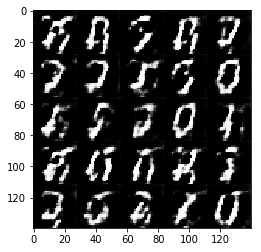

Epoch 1/2... Discriminator Loss: 1.1011... Generator Loss: 0.8517
Epoch 1/2... Discriminator Loss: 1.4756... Generator Loss: 0.4510
Epoch 1/2... Discriminator Loss: 1.2797... Generator Loss: 0.8846


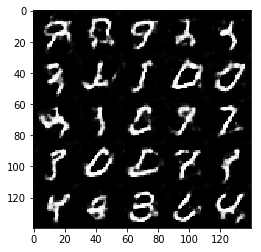

Epoch 1/2... Discriminator Loss: 1.3091... Generator Loss: 0.6199
Epoch 1/2... Discriminator Loss: 1.2868... Generator Loss: 0.6391
Epoch 1/2... Discriminator Loss: 1.1580... Generator Loss: 0.8455


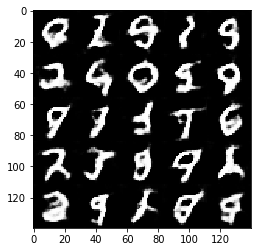

Epoch 1/2... Discriminator Loss: 1.6849... Generator Loss: 0.5724
Epoch 1/2... Discriminator Loss: 1.1197... Generator Loss: 0.8339
Epoch 1/2... Discriminator Loss: 1.3367... Generator Loss: 0.7597


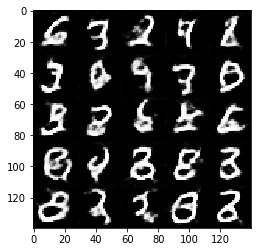

Epoch 2/2... Discriminator Loss: 1.3414... Generator Loss: 0.7327
Epoch 2/2... Discriminator Loss: 0.9112... Generator Loss: 1.0318
Epoch 2/2... Discriminator Loss: 1.3202... Generator Loss: 0.7299


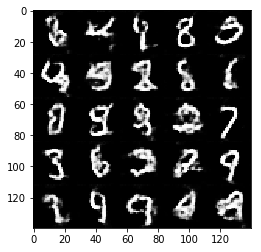

Epoch 2/2... Discriminator Loss: 1.3287... Generator Loss: 0.7232
Epoch 2/2... Discriminator Loss: 1.2215... Generator Loss: 0.7564
Epoch 2/2... Discriminator Loss: 1.2564... Generator Loss: 0.7436


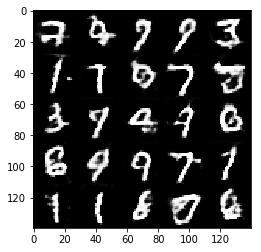

Epoch 2/2... Discriminator Loss: 1.2105... Generator Loss: 0.8725
Epoch 2/2... Discriminator Loss: 1.1122... Generator Loss: 0.9256
Epoch 2/2... Discriminator Loss: 1.1488... Generator Loss: 0.8415


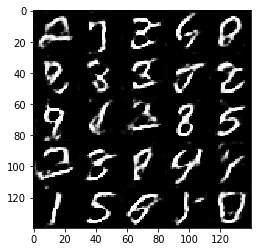

Epoch 2/2... Discriminator Loss: 1.3573... Generator Loss: 0.8254
Epoch 2/2... Discriminator Loss: 1.1774... Generator Loss: 0.8981
Epoch 2/2... Discriminator Loss: 1.5001... Generator Loss: 0.6700


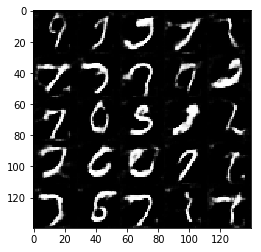

Epoch 2/2... Discriminator Loss: 1.3025... Generator Loss: 0.8488
Epoch 2/2... Discriminator Loss: 1.1946... Generator Loss: 0.7807
Epoch 2/2... Discriminator Loss: 1.3138... Generator Loss: 0.8463


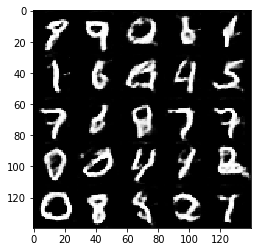

Epoch 2/2... Discriminator Loss: 1.1840... Generator Loss: 0.6886
Epoch 2/2... Discriminator Loss: 1.3099... Generator Loss: 0.7572
Epoch 2/2... Discriminator Loss: 1.2917... Generator Loss: 0.6457


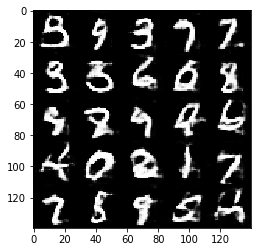

Epoch 2/2... Discriminator Loss: 1.1434... Generator Loss: 0.8349


In [12]:
batch_size = 32
z_dim = 150
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2... Discriminator Loss: 0.4399... Generator Loss: 2.3787
Epoch 1/2... Discriminator Loss: 1.1652... Generator Loss: 0.5883
Epoch 1/2... Discriminator Loss: 0.9264... Generator Loss: 1.3173


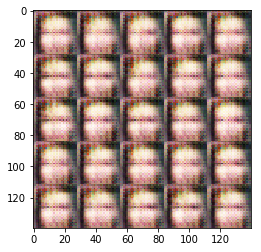

Epoch 1/2... Discriminator Loss: 0.6349... Generator Loss: 1.3194
Epoch 1/2... Discriminator Loss: 0.6105... Generator Loss: 1.6661
Epoch 1/2... Discriminator Loss: 0.7700... Generator Loss: 1.1770


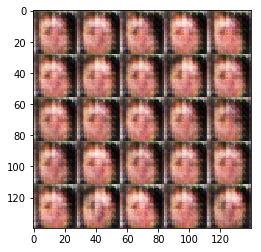

Epoch 1/2... Discriminator Loss: 0.7128... Generator Loss: 2.5093
Epoch 1/2... Discriminator Loss: 1.1797... Generator Loss: 0.6544
Epoch 1/2... Discriminator Loss: 0.8209... Generator Loss: 1.1407


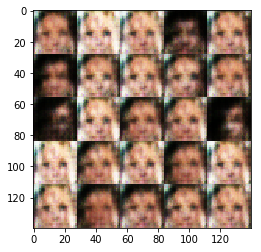

Epoch 1/2... Discriminator Loss: 0.9766... Generator Loss: 0.9199
Epoch 1/2... Discriminator Loss: 0.6691... Generator Loss: 1.6290
Epoch 1/2... Discriminator Loss: 1.3142... Generator Loss: 1.0820


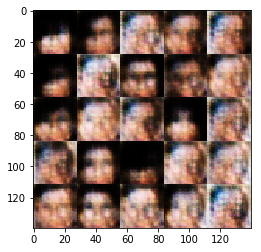

Epoch 1/2... Discriminator Loss: 0.8542... Generator Loss: 1.3003
Epoch 1/2... Discriminator Loss: 1.2241... Generator Loss: 0.8317
Epoch 1/2... Discriminator Loss: 1.0025... Generator Loss: 0.9377


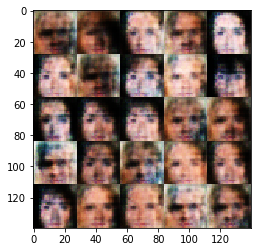

Epoch 1/2... Discriminator Loss: 1.1424... Generator Loss: 0.8442
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 0.8146
Epoch 1/2... Discriminator Loss: 1.2444... Generator Loss: 0.9723


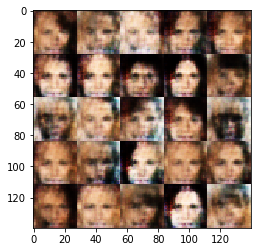

Epoch 1/2... Discriminator Loss: 1.2786... Generator Loss: 0.7843
Epoch 1/2... Discriminator Loss: 0.8804... Generator Loss: 1.5257
Epoch 1/2... Discriminator Loss: 1.1432... Generator Loss: 0.6606


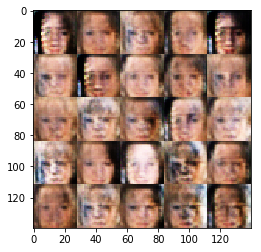

Epoch 1/2... Discriminator Loss: 1.2974... Generator Loss: 0.6667
Epoch 1/2... Discriminator Loss: 1.2766... Generator Loss: 0.8648
Epoch 1/2... Discriminator Loss: 1.0645... Generator Loss: 0.9010


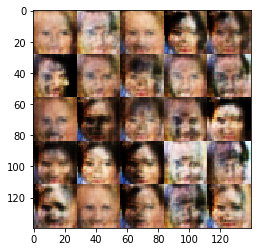

Epoch 1/2... Discriminator Loss: 1.1824... Generator Loss: 0.7883
Epoch 1/2... Discriminator Loss: 1.2571... Generator Loss: 0.8965
Epoch 1/2... Discriminator Loss: 1.0855... Generator Loss: 0.8741


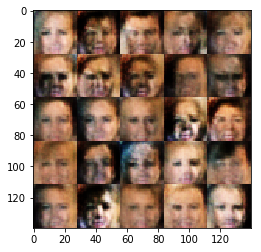

Epoch 1/2... Discriminator Loss: 1.2036... Generator Loss: 0.7084
Epoch 1/2... Discriminator Loss: 1.2288... Generator Loss: 0.7487
Epoch 1/2... Discriminator Loss: 1.3799... Generator Loss: 0.8695


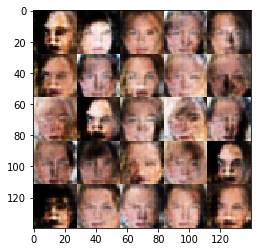

Epoch 1/2... Discriminator Loss: 1.2057... Generator Loss: 0.6595
Epoch 1/2... Discriminator Loss: 1.2965... Generator Loss: 0.8190
Epoch 1/2... Discriminator Loss: 1.1822... Generator Loss: 0.8214


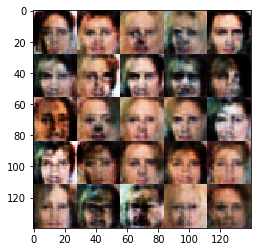

Epoch 1/2... Discriminator Loss: 1.2739... Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 1.1854... Generator Loss: 0.8302
Epoch 1/2... Discriminator Loss: 1.2850... Generator Loss: 0.6431


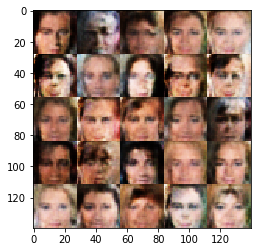

Epoch 1/2... Discriminator Loss: 1.1516... Generator Loss: 0.8850
Epoch 1/2... Discriminator Loss: 1.3749... Generator Loss: 0.6967
Epoch 1/2... Discriminator Loss: 1.2963... Generator Loss: 0.7792


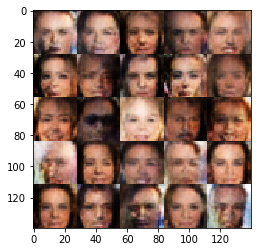

Epoch 1/2... Discriminator Loss: 1.3982... Generator Loss: 0.6984
Epoch 1/2... Discriminator Loss: 1.2975... Generator Loss: 0.7568
Epoch 1/2... Discriminator Loss: 1.2787... Generator Loss: 0.7226


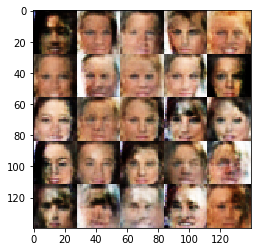

Epoch 1/2... Discriminator Loss: 1.3089... Generator Loss: 0.9386
Epoch 1/2... Discriminator Loss: 1.2853... Generator Loss: 0.7260
Epoch 1/2... Discriminator Loss: 1.2554... Generator Loss: 0.7905


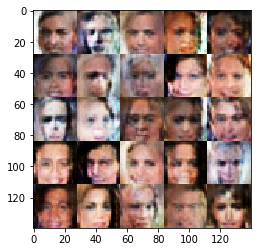

Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 0.6143
Epoch 1/2... Discriminator Loss: 1.3394... Generator Loss: 0.6844
Epoch 1/2... Discriminator Loss: 1.1709... Generator Loss: 0.7640


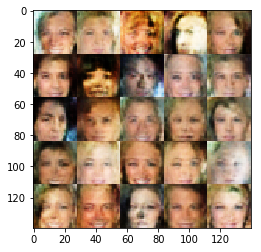

Epoch 1/2... Discriminator Loss: 1.3107... Generator Loss: 0.6728
Epoch 1/2... Discriminator Loss: 1.4455... Generator Loss: 0.6218
Epoch 1/2... Discriminator Loss: 1.3453... Generator Loss: 0.8636


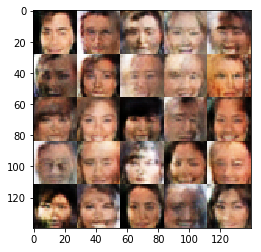

Epoch 1/2... Discriminator Loss: 1.3138... Generator Loss: 0.7417
Epoch 1/2... Discriminator Loss: 1.2787... Generator Loss: 0.7105
Epoch 1/2... Discriminator Loss: 1.2020... Generator Loss: 0.7601


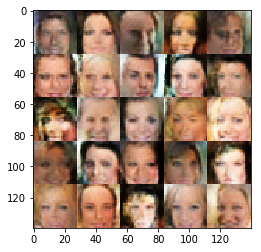

Epoch 1/2... Discriminator Loss: 1.2819... Generator Loss: 0.6959
Epoch 1/2... Discriminator Loss: 1.3950... Generator Loss: 0.6583
Epoch 1/2... Discriminator Loss: 1.3561... Generator Loss: 0.8306


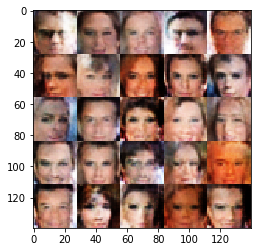

Epoch 1/2... Discriminator Loss: 1.4372... Generator Loss: 0.4991
Epoch 1/2... Discriminator Loss: 1.2883... Generator Loss: 0.7140
Epoch 1/2... Discriminator Loss: 1.4370... Generator Loss: 0.5734


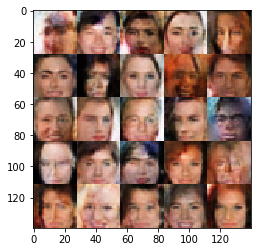

Epoch 1/2... Discriminator Loss: 1.3489... Generator Loss: 0.6821
Epoch 1/2... Discriminator Loss: 1.3425... Generator Loss: 0.7517
Epoch 1/2... Discriminator Loss: 1.3704... Generator Loss: 0.5926


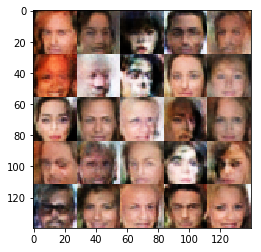

Epoch 2/2... Discriminator Loss: 1.3757... Generator Loss: 0.6638
Epoch 2/2... Discriminator Loss: 1.0869... Generator Loss: 1.2199
Epoch 2/2... Discriminator Loss: 1.3760... Generator Loss: 0.6548


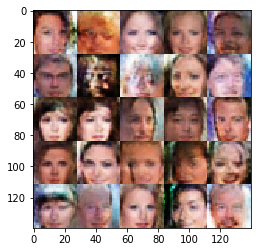

Epoch 2/2... Discriminator Loss: 1.4414... Generator Loss: 0.6430
Epoch 2/2... Discriminator Loss: 1.3535... Generator Loss: 0.6811
Epoch 2/2... Discriminator Loss: 1.3018... Generator Loss: 0.7321


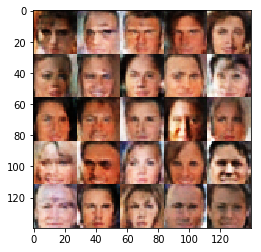

Epoch 2/2... Discriminator Loss: 1.3993... Generator Loss: 0.6220
Epoch 2/2... Discriminator Loss: 1.3384... Generator Loss: 0.7202
Epoch 2/2... Discriminator Loss: 1.2395... Generator Loss: 0.7584


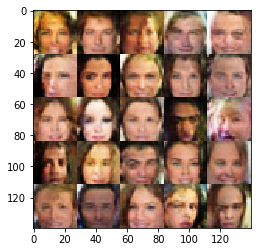

Epoch 2/2... Discriminator Loss: 1.3661... Generator Loss: 0.6299
Epoch 2/2... Discriminator Loss: 1.3970... Generator Loss: 0.6915
Epoch 2/2... Discriminator Loss: 1.5577... Generator Loss: 0.6489


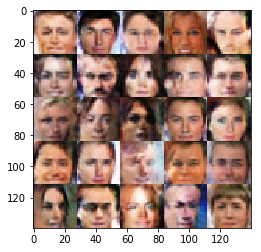

Epoch 2/2... Discriminator Loss: 1.3847... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 1.3360... Generator Loss: 0.7302
Epoch 2/2... Discriminator Loss: 1.2841... Generator Loss: 0.6758


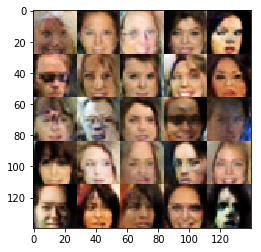

Epoch 2/2... Discriminator Loss: 1.3738... Generator Loss: 0.6470
Epoch 2/2... Discriminator Loss: 1.4751... Generator Loss: 0.6234
Epoch 2/2... Discriminator Loss: 1.2742... Generator Loss: 0.7230


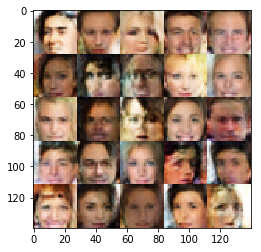

Epoch 2/2... Discriminator Loss: 1.3208... Generator Loss: 0.6574
Epoch 2/2... Discriminator Loss: 1.3745... Generator Loss: 0.5984
Epoch 2/2... Discriminator Loss: 1.3950... Generator Loss: 0.5988


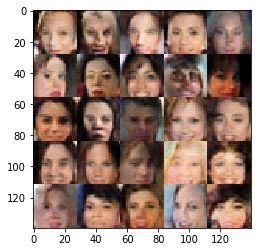

Epoch 2/2... Discriminator Loss: 1.3283... Generator Loss: 0.6742
Epoch 2/2... Discriminator Loss: 1.5020... Generator Loss: 0.5902
Epoch 2/2... Discriminator Loss: 1.4836... Generator Loss: 0.6290


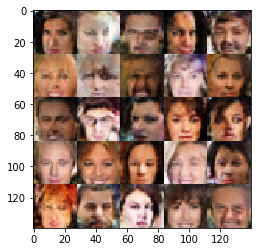

Epoch 2/2... Discriminator Loss: 1.3399... Generator Loss: 0.6538
Epoch 2/2... Discriminator Loss: 1.4349... Generator Loss: 0.6469
Epoch 2/2... Discriminator Loss: 1.4024... Generator Loss: 0.6765


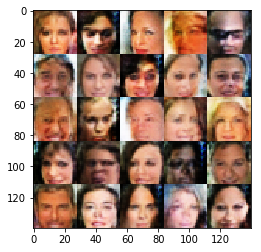

Epoch 2/2... Discriminator Loss: 1.3210... Generator Loss: 0.5502
Epoch 2/2... Discriminator Loss: 1.2628... Generator Loss: 0.6889
Epoch 2/2... Discriminator Loss: 1.4332... Generator Loss: 0.6248


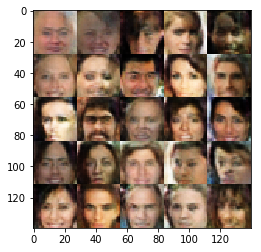

Epoch 2/2... Discriminator Loss: 1.4174... Generator Loss: 0.6454
Epoch 2/2... Discriminator Loss: 1.4563... Generator Loss: 0.5675
Epoch 2/2... Discriminator Loss: 1.3533... Generator Loss: 0.6516


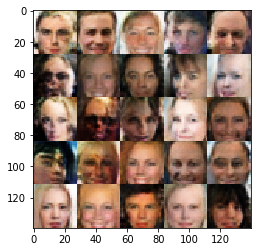

Epoch 2/2... Discriminator Loss: 1.3654... Generator Loss: 0.5993
Epoch 2/2... Discriminator Loss: 1.3651... Generator Loss: 0.7715
Epoch 2/2... Discriminator Loss: 1.3208... Generator Loss: 0.6429


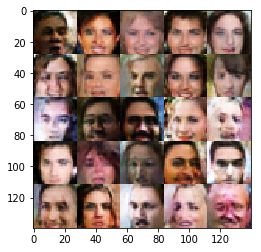

Epoch 2/2... Discriminator Loss: 1.4227... Generator Loss: 0.6385
Epoch 2/2... Discriminator Loss: 1.4241... Generator Loss: 0.6226
Epoch 2/2... Discriminator Loss: 1.3862... Generator Loss: 0.6101


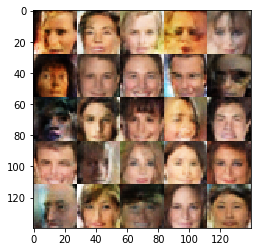

Epoch 2/2... Discriminator Loss: 1.3509... Generator Loss: 0.6528
Epoch 2/2... Discriminator Loss: 1.3756... Generator Loss: 0.6415
Epoch 2/2... Discriminator Loss: 1.3077... Generator Loss: 0.7323


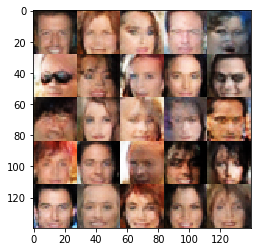

Epoch 2/2... Discriminator Loss: 1.3799... Generator Loss: 0.6387
Epoch 2/2... Discriminator Loss: 1.2670... Generator Loss: 0.6519
Epoch 2/2... Discriminator Loss: 1.3633... Generator Loss: 0.7315


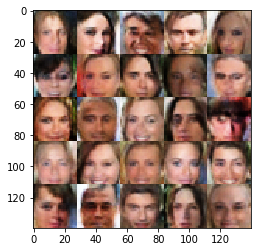

Epoch 2/2... Discriminator Loss: 1.3985... Generator Loss: 0.6539
Epoch 2/2... Discriminator Loss: 1.4137... Generator Loss: 0.6061
Epoch 2/2... Discriminator Loss: 1.4927... Generator Loss: 0.6382


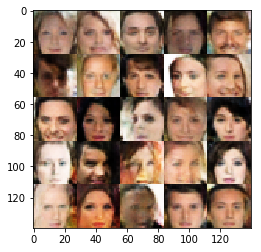

Epoch 2/2... Discriminator Loss: 1.4930... Generator Loss: 0.6181
Epoch 2/2... Discriminator Loss: 1.2980... Generator Loss: 0.6913
Epoch 2/2... Discriminator Loss: 1.4157... Generator Loss: 0.6594


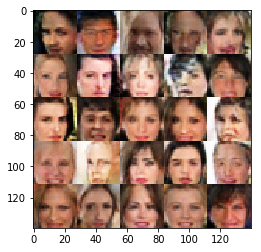

Epoch 2/2... Discriminator Loss: 1.4217... Generator Loss: 0.6301
Epoch 2/2... Discriminator Loss: 1.2188... Generator Loss: 0.6488
Epoch 2/2... Discriminator Loss: 1.3949... Generator Loss: 0.6465


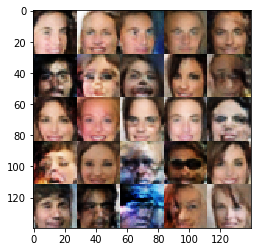

Epoch 2/2... Discriminator Loss: 1.4310... Generator Loss: 0.7413
Epoch 2/2... Discriminator Loss: 1.3532... Generator Loss: 0.6709
Epoch 2/2... Discriminator Loss: 1.3764... Generator Loss: 0.6571


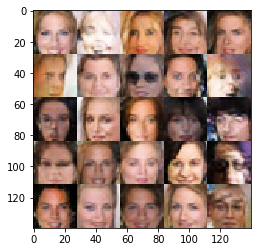

Epoch 2/2... Discriminator Loss: 1.3714... Generator Loss: 0.6861
Epoch 2/2... Discriminator Loss: 1.3482... Generator Loss: 0.6479
Epoch 2/2... Discriminator Loss: 1.3840... Generator Loss: 0.5907


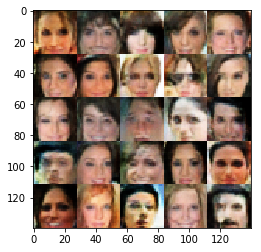

Epoch 2/2... Discriminator Loss: 1.3615... Generator Loss: 0.7093
Epoch 2/2... Discriminator Loss: 1.3543... Generator Loss: 0.6583
Epoch 2/2... Discriminator Loss: 1.4260... Generator Loss: 0.6508


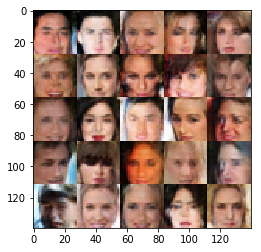

In [13]:
batch_size = 32
z_dim = 300
learning_rate = 0.0002
beta1 = 0.35

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.